In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



-0.684075 0.002525 1.0 0.0
Imaginary... 10 x 10


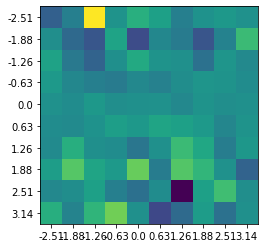

kx... 0.0


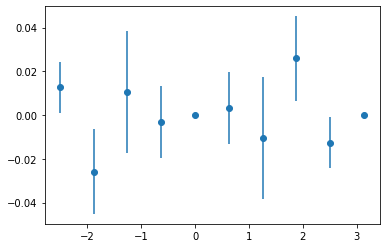

ky... 0.0


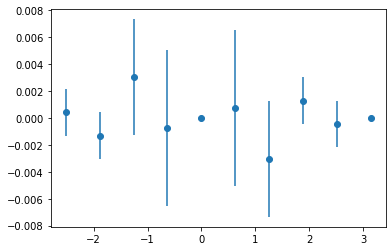

Real... 10 x 10


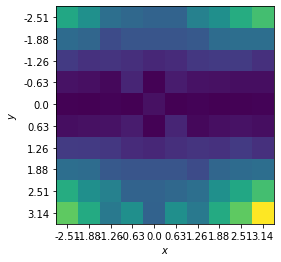

kx... 0.0


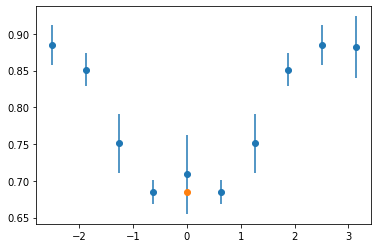

ky... 0.0


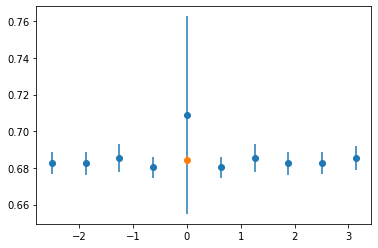

In [10]:

#path='/home/juan/Programs/ALF/pyALF/Scripts/ALF_data'
Options=['SpinZ_tauJ','SpinXY_tauJ','SpinT_tauJ','Green_tauJ','Den_tauJ','Current_tauJ']
Options2=['Kin_scalJ','Ener_scalJ','Kin_X_scalJ','Part_scalJ', 'Pot_scalJ']
RK=['R','K']
LATSZ=[10]
#path_pr='/Users/jfmv/Documents/Proyectos/QMC_tests/H_current/data/'
path_pr='/home/juan/Documents/Projects/QMC_tests/H_current/data/'
path_pr=path_pr+'size_2021-06-02-17-26-35/size_'

val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]


for i in LATSZ:
    
    path=path_pr+str(i)+'/'
    
    ####################################
    ###################################
    ##################################
    #Scalar observables
    ###############################
    ###############################
    ###############################
    
    filename=path+Options2[2]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[i for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')
    
    
    val=float(lines[2][3])
    val_err=float(lines[2][4])
    sign=float(lines[4][3])
    errsign=float(lines[4][4])
    
    val_list.append(val)
    err_list.append(val_err)
    sign_list.append(sign)
    errsign_list.append(errsign)

    print(val,val_err,sign,errsign)
    
    
    ############################
    ###########################
    ############################
    #Current Correlation Function
    ###############################
    #############################
    ###########################
    
    filename=path+Options[-1]+RK[1]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[float(i) for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')

    ##processing coordinates
    xx=np.array(lines)[:,0]
    yy=np.array(lines)[:,1]
    x=list(set(list(np.array(lines)[:,0])))
    y=list(set(list(np.array(lines)[:,1])))
    x.sort()
    y.sort()
    xpl=[round(i,2) for i in x]
    ypl=[round(i,2) for i in y]

    ## getting values if the correlation functions
    real=np.array(lines)[:,2]
    realerr=np.array(lines)[:,3]
    im=np.array(lines)[:,4]
    imerr=np.array(lines)[:,5]
    
    ###########################
    ###########################
    ##plots
    ##########################
    ##########################
    
    ###############################
    ####imgaginary part
    print("Imaginary...",i,"x",i)
    NL=int(np.sqrt(np.size(xx)))
    Npl=np.arange(NL)
    imsq=np.reshape(im,[NL,NL])
    imerrsq=np.reshape(imerr,[NL,NL])
    plt.imshow(imsq.T)
    plt.xticks(Npl,xpl)
    plt.yticks(Npl,ypl)
    plt.show()
    
    i_tr=int(NL/2 -1)
    print('kx...',xpl[i_tr])
    plt.errorbar(ypl,imsq[i_tr,:],imerrsq[i_tr,:], fmt='o')
    plt.show()
    
    j_tr=int(NL/2 -1)
    print('ky...',ypl[j_tr])
    plt.errorbar(xpl,imsq[:,j_tr],imerrsq[:,j_tr], fmt='o')
    plt.show()
    ###############################
    #real part
    print("Real...",i,"x",i)
    NL=int(np.sqrt(np.size(xx)))
    Npl=np.arange(NL)
    realsq=np.reshape(real,[NL,NL])
    realerrsq=np.reshape(realerr,[NL,NL])
    plt.imshow(realsq.T)
    plt.xticks(Npl,xpl)
    plt.yticks(Npl,ypl)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.show()
    
    i_tr=int(NL/2 -1)
    print('kx...',xpl[i_tr])
    plt.errorbar(ypl,realsq[i_tr,:],realerrsq[i_tr,:], fmt='o')
    plt.errorbar(0,-val, val_err, fmt='o')
    plt.show()
    
    j_tr=int(NL/2 -1)
    print('ky...',ypl[j_tr])
    plt.errorbar(xpl,realsq[:,j_tr],realerrsq[:,j_tr], fmt='o')
    plt.errorbar(0,-val, val_err, fmt='o')
    plt.show()
    
    
    